In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.layers import Input, Activation
from keras.layers import Conv2D,Conv3D, MaxPooling2D,MaxPooling3D,TimeDistributed, Concatenate,ConvLSTM2D,BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Bidirectional
from keras.optimizers.legacy import Adam
from keras import regularizers
from keras.models import load_model

import cv2
import os
import keras.utils

In [12]:
import gdown
import numpy as np
import pandas as pd

#download files
url = "https://drive.google.com/uc?export=download&id=1ssOiTlUZJqfav3GhXt1LRQijuJPT4int"
output = "cv_test.csv"
gdown.download(url, output)
url = "https://drive.google.com/uc?export=download&id=1ZN_9gtZ6v8dtvu2hQmYXvwO17iD6Cxi9"
output = "cv_test2.csv"
gdown.download(url, output)
url = "https://drive.google.com/uc?export=download&id=1DnM0QDVfD2TSRJ3kn_4P2MS8dCWlYd6Q"
output = "cv_test3.csv"
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?export=download&id=1ssOiTlUZJqfav3GhXt1LRQijuJPT4int
To: /content/cv_test.csv
100%|██████████| 660M/660M [00:08<00:00, 77.8MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1ZN_9gtZ6v8dtvu2hQmYXvwO17iD6Cxi9
To: /content/cv_test2.csv
100%|██████████| 1.10G/1.10G [00:17<00:00, 61.6MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1DnM0QDVfD2TSRJ3kn_4P2MS8dCWlYd6Q
To: /content/cv_test3.csv
100%|██████████| 246M/246M [00:02<00:00, 115MB/s]


'cv_test3.csv'

In [13]:
# Read the CSV file into a DataFrame
file_1 = pd.read_csv("cv_test.csv")
file_2 = pd.read_csv("cv_test2.csv")
file_3 = pd.read_csv("cv_test3.csv")
# Print the first few rows of the DataFrame
display(file_1.head())

,action_drive,fly_position,heading,speed_integration,velocity,swing_phase,contact_forces_hist_LF,contact_forces_hist_LM,contact_forces_hist_LH,contact_forces_hist_RF,contact_forces_hist_RM,contact_forces_hist_RH,position_hist_LF,position_hist_LM,position_hist_LH,position_hist_RF,position_hist_RM,position_hist_RH
0,[0 0],[ 0.02848877 -0.01062141 1.4806067 ],[7.2401285e-01 2.3491494e-04 6.8978649e-01],[299867.39413216 -24511.47925108],[-1.8328285 0.31234154 0.5264539 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[1.9605963 0.17136937 1.5544988 ],[-0.06821357 2.1959038 1.1749712 ],[-2.2379239 1.1899601 1.1479708],[ 1.9577007 -0.2365798 1.5602977],[-0.04519934 -2.2514932 1.1699475 ],[-2.2335103 -1.2342721 1.149903 ]
1,[0 0],[ 0.02803282 -0.01053594 1.4811776 ],[7.2371471e-01 6.8545889e-04 6.9009894e-01],[299867.39413216 -24511.47925108],[-2.3915298 0.461372 3.4810596],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[1.9801729 0.22224733 1.4911381 ],[-0.06555373 2.197163 1.1390439 ],[-2.233845 1.1978353 1.0849949],[ 1.9764266 -0.28889674 1.496276 ],[-0.03242361 -2.254373 1.1348919 ],[-2.2378836 -1.2339909 1.083456 ]
2,[0 0],[ 0.02751576 -0.01042746 1.482106 ],[0.7233582 0.00127181 0.69047177],[299867.39413216 -24511.47925108],[-2.631432 0.5686775 4.920262 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[1.9965681 0.27956232 1.4075787 ],[-0.06036849 2.19584 1.0923983 ],[-2.2226334 1.2065785 1.0034941],[ 1.9916366 -0.34791452 1.4121149 ],[-0.01468113 -2.2546067 1.0898176 ],[-2.2380795 -1.233409 0.99473786]
3,[0 0],[ 0.02697615 -0.01030263 1.4831498 ],[0.72304326 0.00195112 0.6908 ],[299867.39413216 -24511.47925108],[-2.7114208 0.63988477 5.231925 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[2.006183 0.33644208 1.3105963 ],[-0.05234237 2.1915004 1.0377586 ],[-2.2031264 1.2154773 0.90778357],[ 1.9997803 -0.40665522 1.3146837 ],[ 0.00694766 -2.2516701 1.0373608 ],[-2.2315845 -1.2322184 0.88903075]
4,[0 0],[ 0.02643197 -0.01016862 1.484118 ],[0.722829 0.00267827 0.69102174],[299867.39413216 -24511.47925108],[-2.720436 0.6777012 4.639628 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[2.0072181 0.38932115 1.205703 ],[-0.04149302 2.1838424 0.9774686 ],[-2.1745608 1.2236348 0.8018705],[ 1.9990997 -0.46153507 1.2095615 ],[ 0.03150184 -2.245218 0.97973233],[-2.2163246 -1.2303023 0.7711918]


In [14]:
file1_copy = file_1
#create file we gonna use
file1_copy['fly_position'] = file1_copy['fly_position'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
file1_copy['action_drive'] = file1_copy['action_drive'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
file1_copy['velocity'] = file1_copy['velocity'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
file1_copy['heading'] = file1_copy['heading'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))





In [15]:
display(file_2.head())

,action_drive,fly_position,heading,speed_integration,velocity,swing_phase,contact_forces_hist_LF,contact_forces_hist_LM,contact_forces_hist_LH,contact_forces_hist_RF,contact_forces_hist_RM,contact_forces_hist_RH,position_hist_LF,position_hist_LM,position_hist_LH,position_hist_RF,position_hist_RM,position_hist_RH
0,[0 0],[ 0.02848877 -0.01062141 1.4806067 ],[7.2401285e-01 2.3491494e-04 6.8978649e-01],[-40571.37378226 97437.28386505],[-1.8328285 0.31234154 0.5264539 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[1.9605963 0.17136937 1.5544988 ],[-0.06821357 2.1959038 1.1749712 ],[-2.2379239 1.1899601 1.1479708],[ 1.9577007 -0.2365798 1.5602977],[-0.04519934 -2.2514932 1.1699475 ],[-2.2335103 -1.2342721 1.149903 ]
1,[0 0],[ 0.02803282 -0.01053594 1.4811776 ],[7.2371471e-01 6.8545889e-04 6.9009894e-01],[-40571.37378226 97437.28386505],[-2.3915298 0.461372 3.4810596],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[1.9801729 0.22224733 1.4911381 ],[-0.06555373 2.197163 1.1390439 ],[-2.233845 1.1978353 1.0849949],[ 1.9764266 -0.28889674 1.496276 ],[-0.03242361 -2.254373 1.1348919 ],[-2.2378836 -1.2339909 1.083456 ]
2,[0 0],[ 0.02751576 -0.01042746 1.482106 ],[0.7233582 0.00127181 0.69047177],[-40571.37378226 97437.28386505],[-2.631432 0.5686775 4.920262 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[1.9965681 0.27956232 1.4075787 ],[-0.06036849 2.19584 1.0923983 ],[-2.2226334 1.2065785 1.0034941],[ 1.9916366 -0.34791452 1.4121149 ],[-0.01468113 -2.2546067 1.0898176 ],[-2.2380795 -1.233409 0.99473786]
3,[0 0],[ 0.02697615 -0.01030263 1.4831498 ],[0.72304326 0.00195112 0.6908 ],[-40571.37378226 97437.28386505],[-2.7114208 0.63988477 5.231925 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[2.006183 0.33644208 1.3105963 ],[-0.05234237 2.1915004 1.0377586 ],[-2.2031264 1.2154773 0.90778357],[ 1.9997803 -0.40665522 1.3146837 ],[ 0.00694766 -2.2516701 1.0373608 ],[-2.2315845 -1.2322184 0.88903075]
4,[0 0],[ 0.02643197 -0.01016862 1.484118 ],[0.722829 0.00267827 0.69102174],[-40571.37378226 97437.28386505],[-2.720436 0.6777012 4.639628 ],"[True, True, True, True, False, True]",[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[0. 0. 0.],[2.0072181 0.38932115 1.205703 ],[-0.04149302 2.1838424 0.9774686 ],[-2.1745608 1.2236348 0.8018705],[ 1.9990997 -0.46153507 1.2095615 ],[ 0.03150184 -2.245218 0.97973233],[-2.2163246 -1.2303023 0.7711918]


In [16]:
# Split the DataFrame into parts of 200,000 length
part_length = 200000
n = len(file1_copy)

num_parts = n // part_length
remainder = n % part_length

file1_part = [file1_copy.iloc[i*part_length:(i+1)*part_length] for i in range(num_parts)]

(200000, 18)


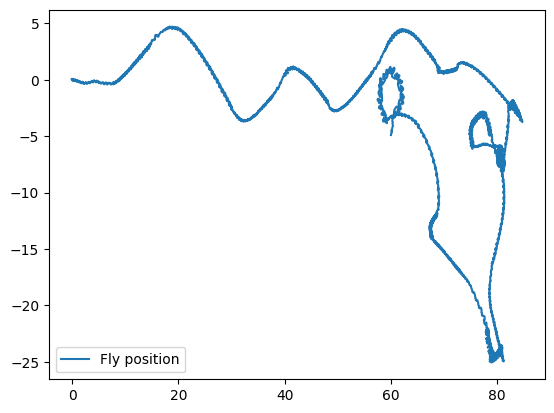

In [17]:
df1 = file1_part[0]
print(np.shape(df1))
#zip the dataframe
pos_x, pos_y = zip(*df1['fly_position'].apply(lambda pos: pos[:2]))
drive_x, drive_y = zip(*df1['action_drive'].apply(lambda pos: pos[:2]))
vel_x,vel_y = zip(*df1['velocity'].apply(lambda pos: pos[:2]))
head_x,head_y = zip(*df1['heading'].apply(lambda pos: pos[:2]))

plt.plot(pos_x,pos_y,label = 'Fly position')
plt.legend()
plt.show()
vel_x = np.array(vel_x)
vel_y = np.array(vel_y)


In [18]:
#start shaping data for lstm
n = 3000 #timesteps for prediction
w = 100 #repeat every
speed_avr = 1000 #average speed over this value (must be greater than n)

x_train = []
y_train = []
x_test = []
y_test = []


def local_to_body(fly_x, fly_y, theta, x1, y1):
    ''' Change coordinates to body frame
        Arg: fly_x: fly x position
             fly_y: fly y position
             theta: file orientation
             x1: x coordinate in local frame
             y1: y coordinate in local frame
        Return: x1,y1, the new coordinates in the body frame
        '''
    rotation_matrix = [
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]

    relative_point = [x1 - fly_x, y1 - fly_y]

    body_frame_x = rotation_matrix[0][0] * relative_point[0] + rotation_matrix[0][1] * relative_point[1]
    body_frame_y = rotation_matrix[1][0] * relative_point[0] + rotation_matrix[1][1] * relative_point[1]

    return body_frame_x, body_frame_y

def average_angle(vector_x,vector_y):

    angles = np.arctan2(vector_x, vector_y)
    avg_angle = np.arctan2(np.mean(np.sin(angles)), np.mean(np.cos(angles)))

    return avg_angle

def avg(vector_x):
  return np.mean(vector_x)

for i in range(n,len(df1),w):
  if i>(n + speed_avr):
      #Preparation of the drive
      x_train.append([drive_x[i-n:i],drive_y[i-n:i]])
      orientation = average_angle(vel_x[i-n-speed_avr:i-n],vel_y[i-n-speed_avr:i-n])
      array_pos = []

      #Position in the local frame
      end_pos = [pos_x[i],pos_y[i]]
      start_pos = [pos_x[i-n],pos_y[i-n]]
      #Convert it to body frame
      x_end,y_end = local_to_body(start_pos[0],start_pos[1],orientation,end_pos[0],end_pos[1])
      #To evaluate on x, replace y_end by x_end
      array_pos.append([y_end])
      array_pos = np.array(array_pos)
      y_train.append(array_pos)


x_train =np.array(x_train)
y_train = np.array(y_train)
x_train = np.transpose(x_train, (0, 2, 1))

#remove the last elements in case of fall
x_train = x_train[:-20, :, :]
y_train = y_train[:-20,:]
y_train = np.squeeze(y_train)

#Split data
num_element= int(len(x_train)* 0.1)

# Generate random indices to select 10% of the data
random_indices = np.random.choice(len(x_train), size=num_element, replace=False)

# Take the randomly selected 10%
x_test = x_train[random_indices]
y_test = y_train[random_indices]

x_train = np.delete(x_train, random_indices, axis=0)
y_train = np.delete(y_train, random_indices, axis=0)

print("Training set shapes:", x_train.shape, y_train.shape)
print("Test set shapes:", x_test.shape, y_test.shape)


Training set shapes: (1746, 3000, 2) (1746,)
Test set shapes: (193, 3000, 2) (193,)


In [20]:

def my_loss_fn(y_true, y_pred):
  "Custom function for debugging in case of necessity "
  mse = (y_true - y_pred) ** 2
  return mse


In [21]:
optimizer_type = Adam(learning_rate=5e-4)  # optimisation algorithm: Adam
loss = 'mse'  # loss
batch_size = 32   # batch size for the training data set
batch_shuffle = True # shuffle the training data prior to batching before each epoch

In [22]:
def define_model(inputs1):
    ''' Our model, one LSTM layer then 2 dense layer to output the difference in position
        Args: inputs1: (None,3000,2) array containing the drive
        Outputs: x: Number represnting a delta in one coordinate '''
    x = tf.keras.layers.LSTM(16, activation='sigmoid', return_sequences=False)(inputs1)
    x = Dense(8, activation='linear')(x)
    x = Dense(1, activation='linear')(x)

    return x

In [23]:
#Declare ou model
inputs_drive = Input(shape = (n,2))
outputs = define_model(inputs_drive)
model = Model(inputs=[inputs_drive], outputs=outputs)
model.compile(optimizer=optimizer_type, loss=loss)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3000, 2)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1216      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1361 (5.32 KB)
Trainable params: 1361 (5.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [24]:
#train the model
history = model.fit(x_train,
                      y_train,
                      shuffle=batch_shuffle,
                      epochs=20,
                      batch_size=batch_size,verbose = 2,
                      validation_data=(x_test,y_test))

Epoch 1/20
55/55 - 50s - loss: 7.2413 - val_loss: 4.4532 - 50s/epoch - 905ms/step
Epoch 2/20
55/55 - 45s - loss: 3.1243 - val_loss: 2.1151 - 45s/epoch - 818ms/step
Epoch 3/20
55/55 - 46s - loss: 1.7630 - val_loss: 1.7626 - 46s/epoch - 845ms/step
Epoch 4/20
55/55 - 44s - loss: 1.5685 - val_loss: 1.6938 - 44s/epoch - 802ms/step
Epoch 5/20
55/55 - 44s - loss: 1.4984 - val_loss: 1.6320 - 44s/epoch - 804ms/step
Epoch 6/20
55/55 - 44s - loss: 1.4411 - val_loss: 1.5805 - 44s/epoch - 800ms/step
Epoch 7/20
55/55 - 45s - loss: 1.3940 - val_loss: 1.5323 - 45s/epoch - 822ms/step
Epoch 8/20
55/55 - 46s - loss: 1.3535 - val_loss: 1.4959 - 46s/epoch - 833ms/step
Epoch 9/20
55/55 - 43s - loss: 1.3207 - val_loss: 1.4611 - 43s/epoch - 781ms/step
Epoch 10/20
55/55 - 46s - loss: 1.2919 - val_loss: 1.4329 - 46s/epoch - 841ms/step
Epoch 11/20
55/55 - 42s - loss: 1.2663 - val_loss: 1.4062 - 42s/epoch - 769ms/step
Epoch 12/20
55/55 - 42s - loss: 1.2436 - val_loss: 1.4007 - 42s/epoch - 767ms/step
Epoch 13/20
5

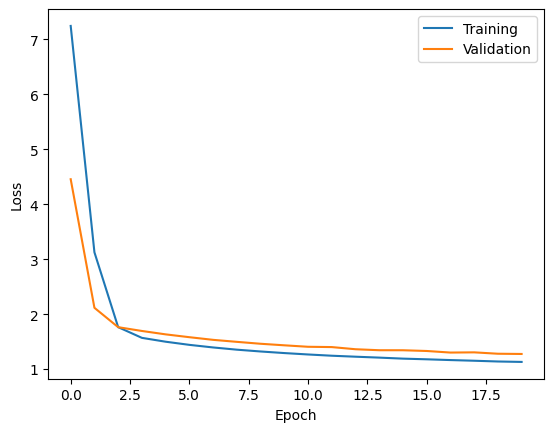

In [25]:
#Loss results
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()
plt.close()

In [26]:
#Show prediction
predictions = model.predict([x_test])

7/7 [==============================] - 1s 161ms/step


(193, 1)


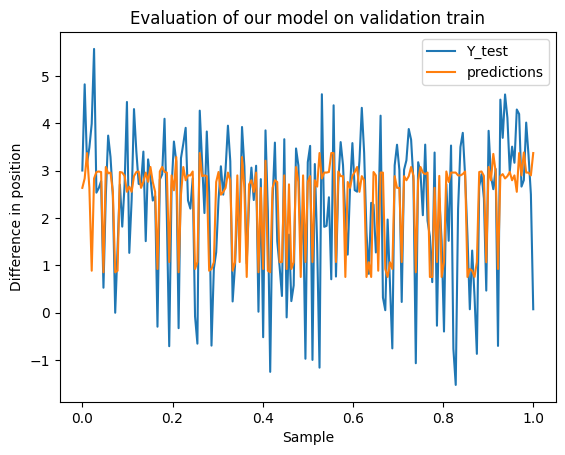

In [27]:
print(np.shape(predictions))
timestamps = np.linspace(0,1,len(y_test))
plt.plot(timestamps,y_test,label = 'Y_test')
plt.plot(timestamps,predictions,label = 'predictions')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Difference in position')
plt.title('Evaluation of our model on validation train')
plt.show()



In [28]:
#save model
model.save('lstm_final_y.keras')


In [29]:
#Evaluate on one sample
print(np.shape(x_test[1,:,:]))
input_data = x_test[1, :, :].reshape((1, 3000, 2))

prediction = model.predict(input_data)
print(prediction)

(3000, 2)
1/1 [==============================] - 0s 265ms/step
[[2.8339248]]
